<img src="images/banner.png" alt="Folded outcrop" />

# Duplex example
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoopStructural import GeologicalModel
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_duplex
import matplotlib.pyplot as plt
%matplotlib inline

## Define model bounding box

In [2]:
data, boundary_points = load_duplex()#np.zeros((2,3))


In [3]:
splay_region = lambda pos : np.logical_or(pos[:,0] < (-6.5-model.origin[0])/model.scale_factor, pos[:,0] 
                                          > (5-model.origin[0])/model.scale_factor)

In [4]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)

In [5]:
fault1 = model.create_and_add_fault('fault2',
                                    -2.,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
#                                     precon=precon,
                                    buffer=np.array([0.5,0.2,0.3]),
                                    regularisation=[2.,.2,.2],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10
                                    
                                   )
# splay_region = lambda pos : np.logical_or(fault1['feature'].apply_to_points(pos)[:,0] < (-4.5-model.origin[0])/model.scale_factor, 
#                                           fault1['feature'].apply_to_points(pos)[:,0] > (4.5-model.origin[0])/model.scale_factor)
fault2 = model.create_and_add_fault('fault1',
                                    -2,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
                                    splayregion=splay_region,
                                    splay = fault1['feature'],
                                    regularisation=[2.,.5,.5],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
#                                     precon=precon,
                                    buffer=np.array([0.6,0.2,0.2]),
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10,
                                    overprinted=['fault2'],
                                   )
strati = model.create_and_add_foliation('strati',
                                        solver='lu',
                                        interpolatortype='FDI', 
                                        nelements=1500,
                                        damp=True,
                                        buffer=np.array([0.8,0.4,0.4])
                                       )

c:\users\lgrose\.conda\envs\loop\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\lgrose\.conda\envs\loop\lib\site-packages\LoopStructural\modelling\fault\fault_segment.py:176: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\LoopStructural\modelling\fault\fault_segment.py:177: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\LoopStructural\modelling\fault\fault_segment.py:200: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\LoopStructural\modelling\fault\fault_segme


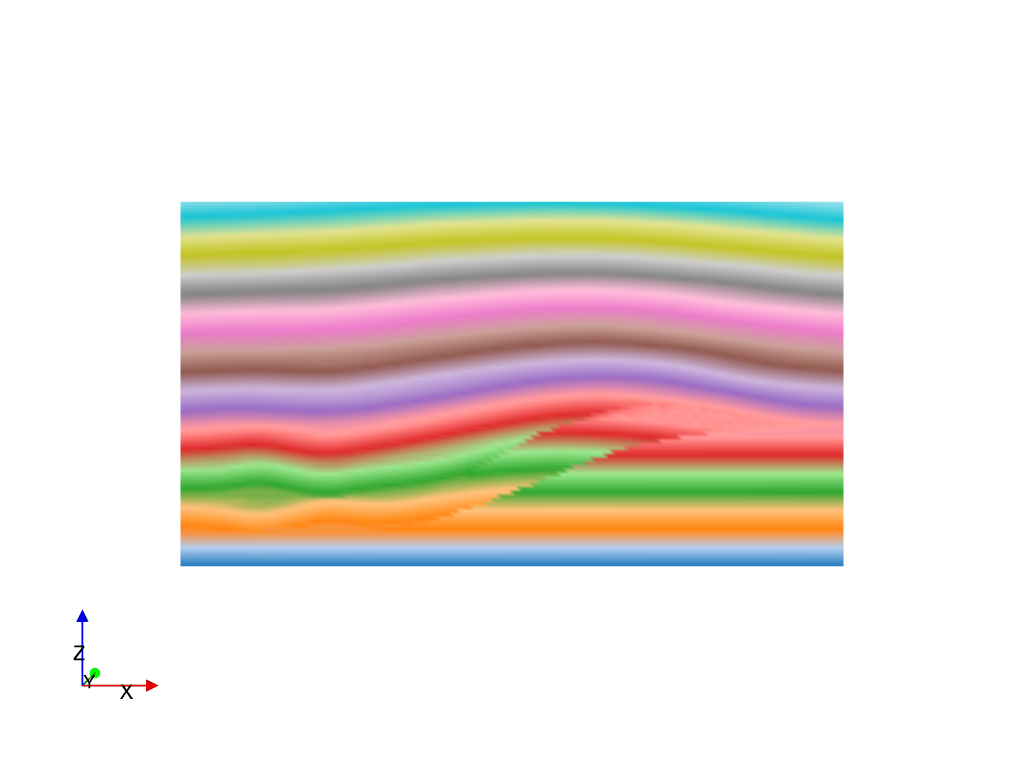

In [6]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
# viewer.add_vector_field(strati['feature'])#,locations=nodes2)#,model.regular_grid((25,25,12)))

viewer.add_scalar_field(strati['feature'],cmap='tab20')
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('fault_duplex_scalar_field.png')
viewer.lv.display()

Build mesh and link to interpolator

In [7]:
mesh = TetMesh()
mesh.setup_mesh(boundary_points, nstep=1, n_tetra=30000,)
interpolator = PLI(mesh)
stratigraphy_builder = GeologicalFeatureInterpolator(
    interpolator=interpolator,
    name='stratigraphy')

NameError: name 'TetMesh' is not defined

Add data to the interpolator for flat lying stratigraph. Only a single value point and flat orientation measurement is required.

In [ ]:
solver = 'lu'
stratigraphy_builder.add_point([6.1,0.1,1.1],0.)
stratigraphy_builder.add_strike_and_dip([1,1,1],90.,0.)
stratigraphy = stratigraphy_builder.build(solver=solver)

Define younger fault geometry - floor and roof are the relative heights of the bottom and top flat sections of the duplex structure. You can change these $\pm 2$

In [ ]:
floor = -4
roof = 4
fault_interpolator = PLI(mesh)
fault = StructuralFrameBuilder(interpolator=fault_interpolator,mesh=mesh,name='FaultSegment1')
for y in range(-5,5,1):
    fault.add_strike_dip_and_value([-35.17,y,floor],strike=0.,dip=0.,val=0,itype='gx')
    fault.add_strike_dip_and_value([-25.17,y,floor],strike=0.,dip=0.,val=0,itype='gx')
    fault.add_strike_dip_and_value([-5.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    fault.add_strike_dip_and_value([15.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    fault.add_strike_dip_and_value([18.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    
fault.add_point([2.5,5,1.5],0.,itype='gz')
fault.add_point([2.5,-5,1.5],1.,itype='gz')
for y in range(-20,20,1):
    fault.add_point([-10.5,y,floor],0.,itype='gy')
    fault.add_point([11.56,y,roof],1.,itype='gy')
    
fault_frame = fault.build(
    solver=solver,
    cpw=10,
    gpw=10
)
fault_frame2_interpolator = PLI(mesh)



Define older fault geometry

In [ ]:
fault2 = StructuralFrameBuilder(
    interpolator=fault_frame2_interpolator,
    mesh=mesh,
    name='FaultSegment2'
)
for y in range(-5,5,1):
    fault2.add_strike_dip_and_value([-18.17,y,floor],strike=0.,dip=0.,val=0,itype='gx')
    fault2.add_strike_dip_and_value([-15.17,y,floor],strike=0.,dip=0.,val=0,itype='gx')
    fault2.add_strike_dip_and_value([-10.17,y,floor],strike=0.,dip=0.,val=0,itype='gx')
    fault2.add_strike_dip_and_value([8.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    fault2.add_strike_dip_and_value([15.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    fault2.add_strike_dip_and_value([18.17,y,roof],strike=0.,dip=0.,val=0,itype='gx')
    fault_operator = FaultSegment(fault_frame)
fault2.add_point([2.5,5,1.5],0.,itype='gz')
fault2.add_point([2.5,-5,1.5],1.,itype='gz')
for y in range(-5,5,1):
    fault2.add_point([-10.5,y,floor],0.,itype='gy')
    fault2.add_point([11.56,y,roof],1.,itype='gy')
fault_frame2 = fault2.build(
    solver='lu',
    cpw=10,
    gpw=10
)



Define fault operators and appy younger fault to restore older fault displacement can be changed $\pm 2$

In [ ]:
fault = FaultSegment(fault_frame, 
                     displacement=-4.5)
fault2 = FaultSegment(fault_frame2, 
                      displacement=-4.5)
faulted_frame = []
for f in fault_frame.features:
    faulted_frame.append(FaultedGeologicalFeature(f, fault2))
#
structural_frame2 = StructuralFrame("faulted_frame", faulted_frame)

In [ ]:
faulted1_op = FaultSegment(structural_frame2, 
                           displacement=-4.5)

**Use the following cell for modelling only the younger fault**

In [ ]:
faulted_strati = FaultedGeologicalFeature(stratigraphy, fault2)

**Comment out the previous lines and uncomment the following lines to use both faults**
To comment and uncomment code select the lines with your cursor and press `crtrl` `/` (or add `#` to the start of a line) 

In [ ]:
# faulted_strati = FaultedGeologicalFeature(
#     FaultedGeologicalFeature(stratigraphy, fault2),
#     faulted1_op) #fault_operator)#

In [ ]:
viewer = LavaVuModelViewer(background="white")
slices = [-4,-2,0]
viewer.add_isosurface(
    fault_frame2.features[0],
    isovalue=0,
    colour='black'
)
viewer.add_isosurface(
    structural_frame2.features[0],
    isovalue=0,
    colour='black'
)
locations = mesh.barycentre[::10, :]
viewer.add_isosurface(
    faulted_strati,
    paint_with=faulted_strati,
    # colour='green',
    nslices=10
)
viewer.add_isosurface(fault_frame.features[0],
                     isovalue=0)
viewer.add_data(fault_frame.features[0])
viewer.add_data(fault_frame2.features[0])
viewer.interactive()

In [ ]:
viewer = LavaVuModelViewer()
viewer.add_isosurface(
    fault_frame2.features[0],
    isovalue=0,
    colour='black'
)
viewer.add_isosurface(
    structural_frame2.features[0],
    isovalue=0,
    colour='black'
)
viewer.add_isosurface(
    fault_frame.features[0],
    isovalue=0,
    colour='red'
)
nodes = mesh.nodes[::20]
nodes = nodes[fault_frame2.features[0].evaluate_value(nodes)>0] 
viewer.add_vector_field(fault_frame2.features[1],nodes,pointsize=4)
nodes = mesh.nodes[::20]
nodes = nodes[structural_frame2.features[0].evaluate_value(nodes)>0] 
viewer.add_vector_field(structural_frame2.features[1],nodes,pointsize=4)
viewer.interactive()

In [ ]:
viewer = LavaVuModelViewer()
viewer.add_scalar_field(boundary_points,
                      (100,100,50),
                      's0',
                      cmap='tab20',
                      paint_with=faulted_strati)
viewer.interactive()